# Overview
In this notebook, we will produce the basic results about how firms' financial flows are going to respond to monetary shocks. The regression design follows the one used in Romer and Romer (2004):


# Main Result: Gross Issuance of Equity and Debt

The monthly gross issuance flows are collected from the data sets provided on Wurgler's website: http://www.stern.nyu.edu/~jwurgler/data/Equity_Share_3.xls The nominal flows are converted to real by quarterly PPI downloaded from FRED. The regression specification follows Romer and Romer (2004):
$$ 
\begin{align}\Delta Y_{t}=&\texttt{constant}+\sum_{\eta=1}^{2\times 12} \beta_{\eta}\cdot \Delta Y_{t-\eta}+\sum_{s=2}^{12}\theta_{s}\cdot \mathbf{1}_{\texttt{month}_{t}=s}\\
&+\sum_{\iota=0}^{3\times 12} \gamma_{\iota}\cdot MS_{t-\iota}+\varepsilon_{t} 
\end{align}
$$
where $ Y $ will be either the log-level or the normalized-level of flows. The responses of interest will be measured as 
$$ \texttt{IRF}_{h}=\sum_{\iota=0}^{h} \gamma_{\iota}$$
The sample spans from 1970 Q1 to 2007 Q2 and $ Y\equiv log(\texttt{Issuance Flow})$. The main result can be summarized by the following impulse response plot:

In [2]:
#%% Import Moduels

## System Tools
import os
import numpy as np
## I/O Tools
import _pickle as pickle
## Data Process Tools
import pandas as pd
import datetime
## Graphs
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as figpdf
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
## Statistical Tools
import statsmodels.api as sm
## Database API
from fredapi import Fred


# End of Section: Import Moduels
###############################################################################


#%% Setup Work Directory

## Office Desktop Directory
#os.chdir("E:\\Dropbox")
## Home Desktop Directory
os.chdir("L:\Dropbox")
## Laptop Directory
#os.chdir("/Users/xingguo/Dropbox/")

##Windows System Path
os.chdir("Research Projects\\EquityMarkets_MonetaryPolicy\\Data\\Macro_data\\codes")
##Mac System Path
#os.chdir("Research Projects/OttonelloGuo/Response2MonetaryShock/Monthly")

# End of Section: Setup Work Directory
###############################################################################

#%% Import Self-written Functions

## NBER data plot
exec(open('Fun_NBER_date.py').read())
exec(open('Fun_RomerRomerReg.py').read())
exec(open('Fun_IRF_Plot.py').read())
# End of Section: Import Self-written Functions
###############################################################################

__main__:38: RuntimeWarning: invalid value encountered in log


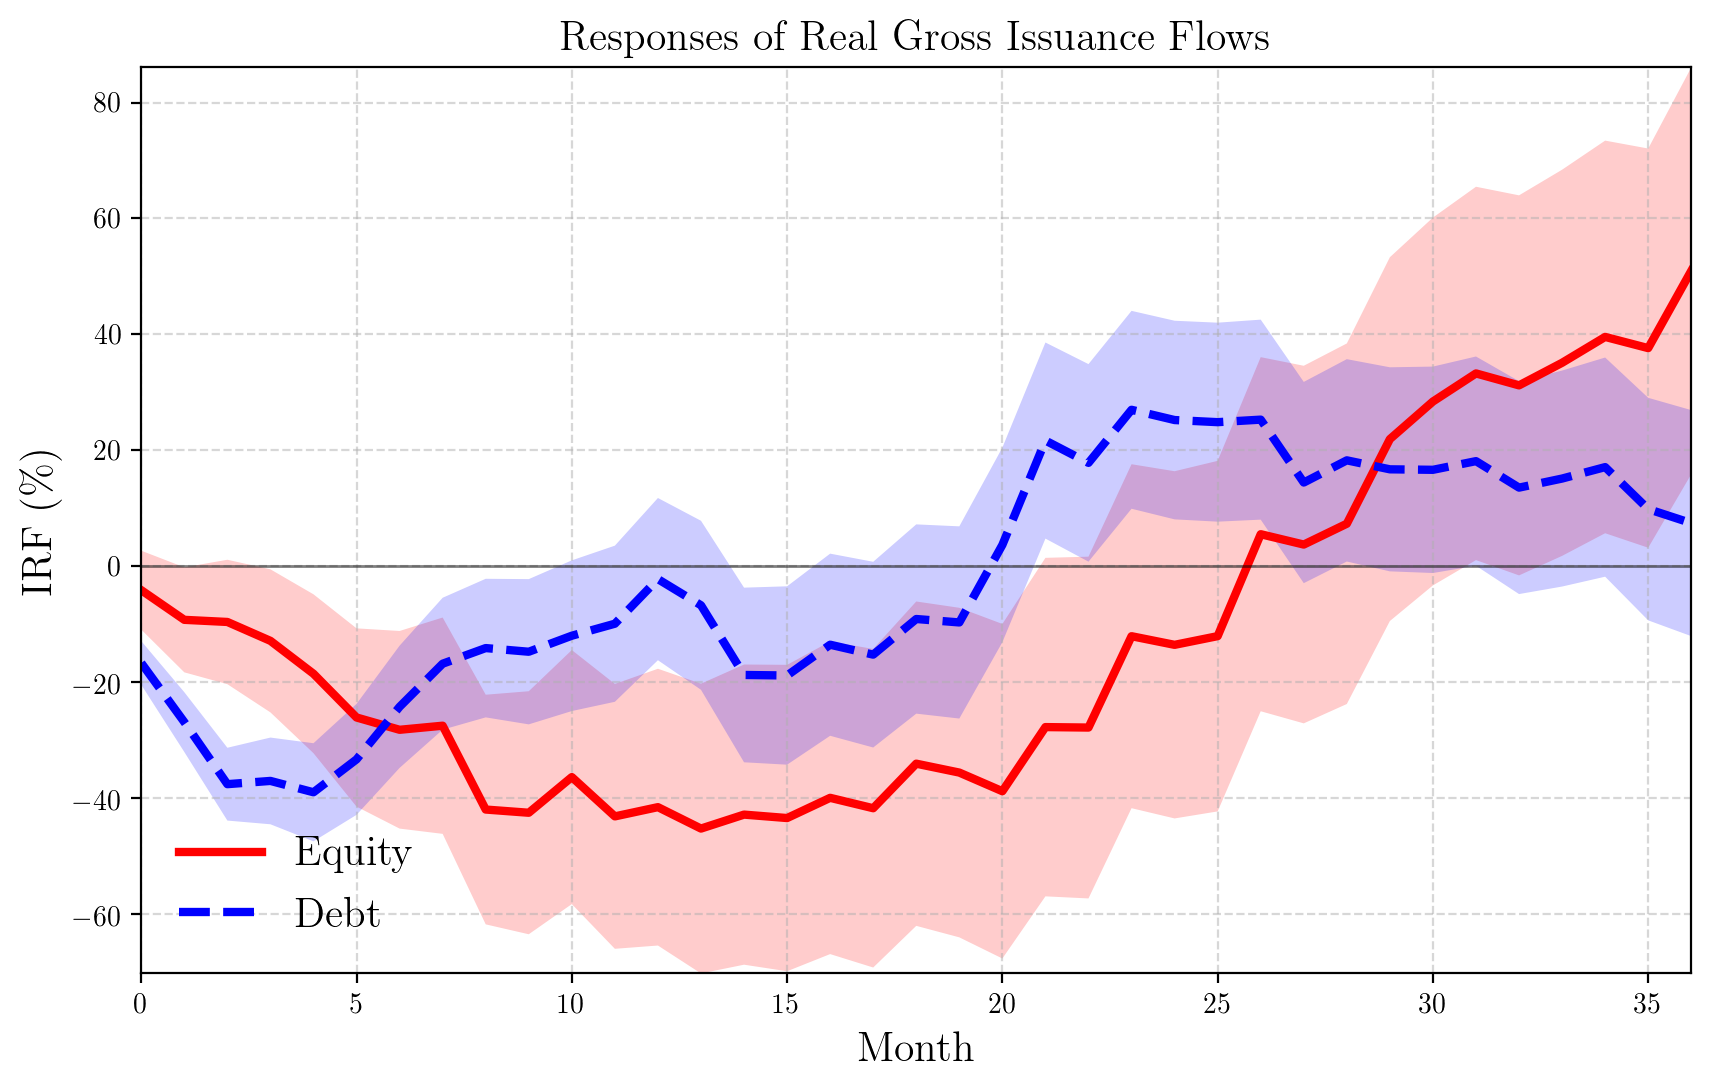

In [3]:
#%% Main Result: Monthly Gross Issuance to Monetary Shocks

### Construct the Sample 
## Read-in Data
# Real Gross Issuance Flows
DataFolder  =   "..\\temp\\"
GrossIss_M  =   pickle.load(open(DataFolder+"GrossIss_M.p",'rb'))

# Monthly Monetary Shock Data from Wieland
RRShock     =   pd.read_stata("..\\datasets\\MonetaryShocks_FromWieland"+
                              "\\RR_monetary_shock_monthly.dta")
RRShock.set_index('date',inplace=True)

## Sample for Regression 
Sample      =   RRShock.merge(right=GrossIss_M,how='outer', \
                              left_index=True,right_index=True)
Sample.sort_index(inplace=True)
Sample.index=   Sample.index.map(lambda x: x.date)

## Sample Cleaning
# Set Monetary Shocks before March, 1969 to 0
Sample.loc[Sample.index<datetime.date(1969,3,1), \
           ['resid','resid_romer','resid_full']]    =   0
# Generate Season Variables
Sample['Month']         =   Sample.index.map(lambda x: x.month)

### Run Regression and Collect the IRF

## Setup
StartEndDate    =   [datetime.date(1970,1,1),datetime.date(2007,6,30)]
LagMin_Shock    =   0
LagNum_Shock    =   3*12

LagNum_Res      =   2*12

## Regression
Sample[['Equity','Debt']] \
                =   np.log(Sample[['Equity','Debt']])
ResVarList      =   ['Equity','Debt','EShare']

for ii in range(len(ResVarList)):
    ResVar          =   ResVarList[ii]
    TempIRF,TempSTD,TempRegResult   \
                    =   RomerRomerReg(Sample, \
                                      ResVar,'resid_full','Month', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Diff',IRFType='Accumulated')
    if ii==0:
        IRF             =   TempIRF
        STD             =   TempSTD
        RegResultList   =   {}
        RegResultList[ResVar] \
                        =   TempRegResult
    else:
        IRF             =   IRF.join(TempIRF)
        STD             =   STD.join(TempSTD)
        RegResultList[ResVar] \
                        =   TempRegResult
## IRF Plot
GraphFolder     =   "..\\results\\Main\\"
# Issuance Flows
IRF_Plot(IRF*100,STD*100,['Equity','Debt'],['Equity','Debt'], \
         ['solid','dashed'],['red','blue'], \
         FileName=GraphFolder+'GrossIss2MS_Monthly.pdf', \
         Title='Responses of Real Gross Issuance Flows', \
         XLabel='Month',YLabel='IRF (\%)')
# End of Section: 
###############################################################################

Similar investigation was also implemented on the quarterly data, where the regression specification is: 
$$ 
\begin{align}\Delta Y_{t}=&\texttt{constant}+\sum_{\eta=1}^{2\times 4} \beta_{\eta}\cdot \Delta Y_{t-\eta}+\sum_{s=2}^{4}\theta_{s}\cdot \mathbf{1}_{\texttt{quarter}_{t}=s}\\
&+\sum_{\iota=0}^{3\times 4} \gamma_{\iota}\cdot MS_{t-\iota}+\varepsilon_{t} 
\end{align}
$$
The impulse response at quarterly frequency is:

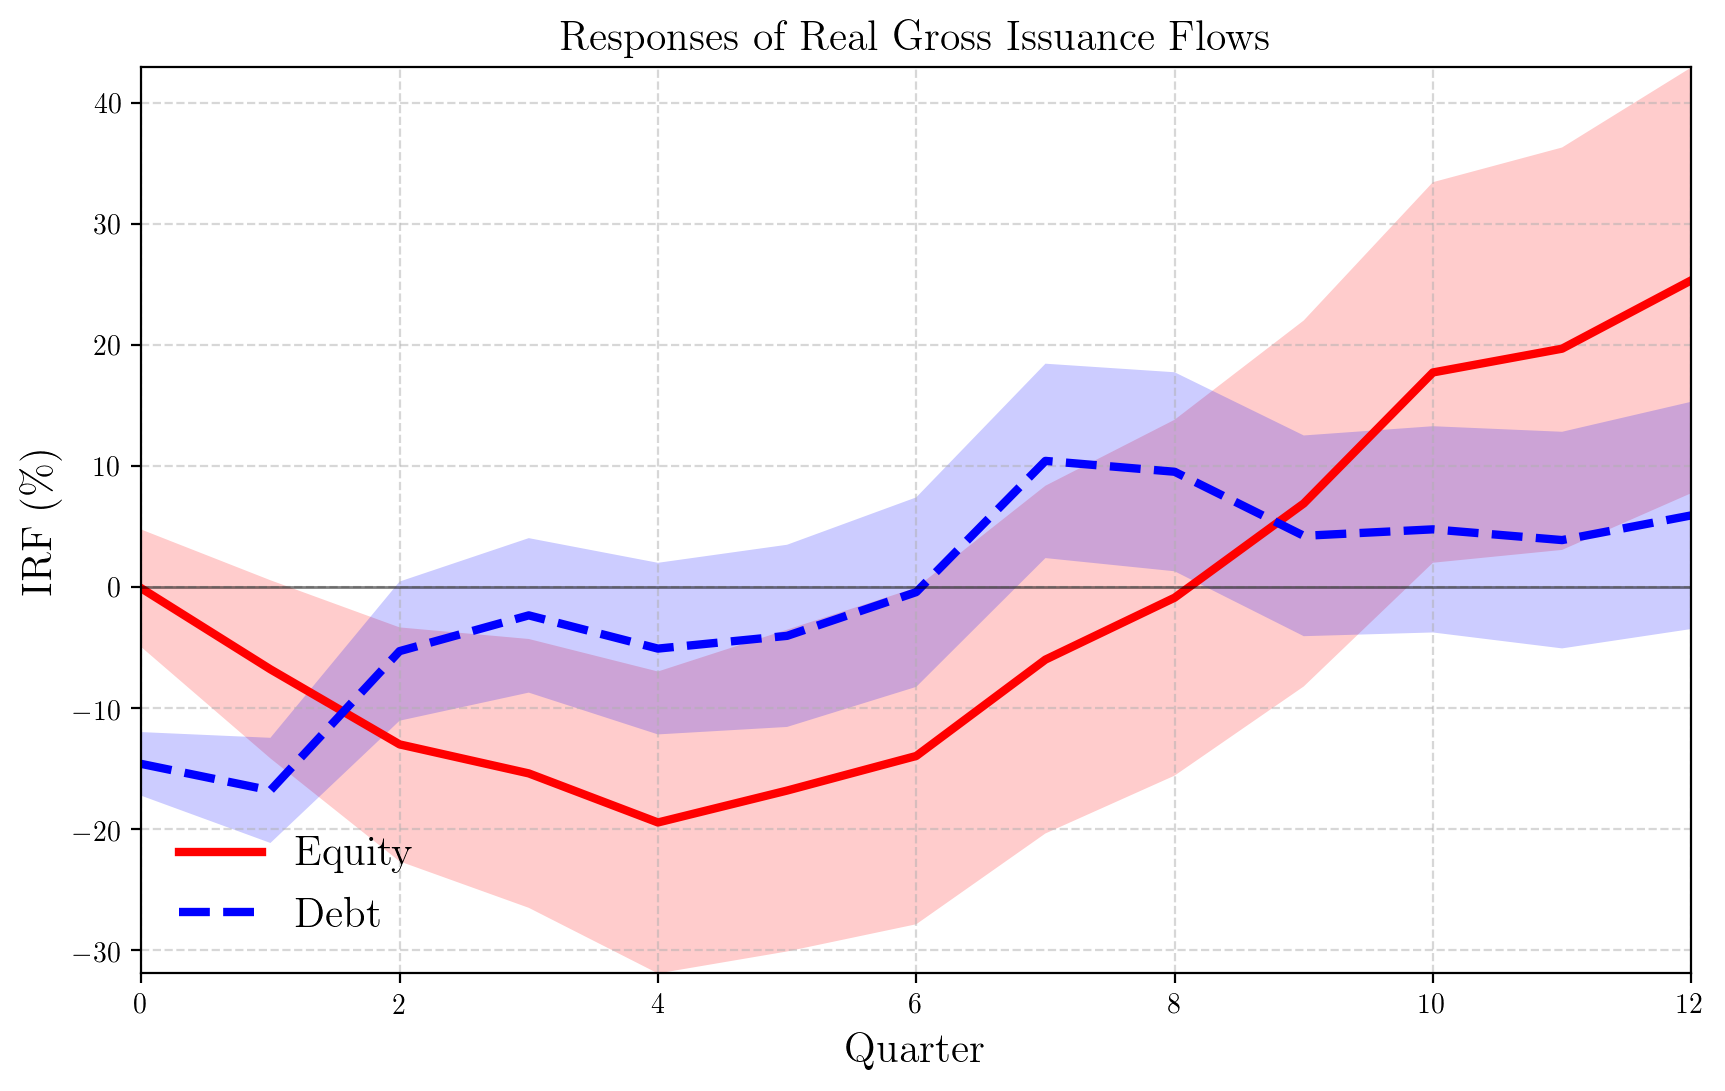

In [4]:
#%% Main Result: Quarterly Gross Issuance to Monetary Shocks

### Construct the Sample 
## Read-in Data
# Real Gross Issuance Flows
DataFolder  =   "..\\temp\\"
GrossIss_Q  =   pickle.load(open(DataFolder+"GrossIss_Q.p",'rb'))

# Quarterly Monetary Shock Data from Wieland
RRShock     =   pd.read_stata("..\\datasets\\MonetaryShocks_FromWieland"+
                              "\\RR_monetary_shock_quarterly.dta")
RRShock.set_index('date',inplace=True)

## Sample for Regression 
Sample      =   RRShock.merge(right=GrossIss_Q,how='outer', \
                              left_index=True,right_index=True)
Sample.sort_index(inplace=True)
Sample.index=   Sample.index.map(lambda x: x.date)

## Sample Cleaning
# Set Monetary Shocks before March, 1969 to 0
Sample.loc[Sample.index<datetime.date(1969,3,1), \
           ['resid','resid_romer','resid_full']]    =   0
# Generate Season Variables
Sample['Quarter']   =   Sample.index.map(lambda x: np.ceil(x.month/3))

### Run Regression and Collect the IRF

## Setup
StartEndDate        =   [datetime.date(1970,1,1),datetime.date(2007,6,30)]

LagMin_Shock        =   0
LagNum_Shock        =   3*4

LagNum_Res          =   2*4

## Regression
Sample[['Equity','Debt']] \
                =   np.log(Sample[['Equity','Debt']])
ResVarList      =   ['Equity','Debt','EShare']

for ii in range(len(ResVarList)):
    ResVar          =   ResVarList[ii]
    TempIRF,TempSTD,TempRegResult   \
                    =   RomerRomerReg(Sample, \
                                      ResVar,'resid_full','Quarter', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Diff',IRFType='Accumulated')
    if ii==0:
        IRF             =   TempIRF
        STD             =   TempSTD
    else:
        IRF             =   IRF.join(TempIRF)
        STD             =   STD.join(TempSTD)
### Generate the IRF Plots
GraphFolder     =   "..\\results\\Main\\"
## Issuance Flows
IRF_Plot(IRF*100,STD*100,['Equity','Debt'],['Equity','Debt'], \
         ['solid','dashed'],['red','blue'], \
         FileName=GraphFolder+'GrossIss2MS_Quarterly.pdf', \
         Title='Responses of Real Gross Issuance Flows', \
         XLabel='Quarter',YLabel='IRF (\%)')

# End of Section:
###############################################################################


# Robustness Check

In [12]:
#%% Robustness Check: Other Quarterly Financial Flows


### Construct the Sample
## Read-in Data
# Quarterly Flow of Funds and the Related Time-series
DataFolder          =   "..\\temp\\"
Sample_Q            =   pickle.load(open(DataFolder+"FoF_Q.p",'rb'))

# Romer and Romer Shocks
RRShock_Q           =   pd.read_stata("..\\datasets\\MonetaryShocks_FromWieland"+
                                      "\\RR_monetary_shock_quarterly.dta")
RRShock_Q.set_index('date',inplace=True)
# Merged Sample
Sample_Q            =   Sample_Q.merge(right=RRShock_Q,how='outer', \
                                       left_index=True,right_index=True)

## Sample Cleaning
# Season ID
Sample_Q['Quarter'] =   Sample_Q.index.map(lambda x: x.quarter)
Sample_Q.index      =   Sample_Q.index.map(lambda x: x.date)
# Set Monetary Shocks before March, 1969 to 0
Sample_Q.loc[Sample_Q.index<datetime.date(1969,3,1), \
             ['resid','resid_romer','resid_full']] \
                    =   0


### Run Regression and Collect the IRF
## Setup                    
LagMin_Shock        =   0
LagNum_Shock        =   3*4

LagNum_Res          =   2*4

StartEndDate        =   [datetime.date(1970,1,1),datetime.date(2007,6,30)]

## Regressions
# List of Normalized Response Variables 
FlowVarList_Cor     =   ['EquityFin','EquityNetIssue','EquityNetIssueExMA','DivPayment', \
                         'EquityIssue','EquityRepurchase','EquityMA', \
                         'EquityIssuePublic','EquityIssuePrivate', \
                         'EquityIssueIPO','EquityIssueSEO', \
                         'EquityGrossIssue','DebtGrossIssue', \
                         'DebtFin','DebtSecurity', \
                         'Inv']
FlowVarList_NonCor  =   ['EquityFin','DebtFin','Inv']
NormVarList         =   ['Trend_TotalAsset','LagTotalAsset','GrossValAdd']

SpecialNegVarList   =   ['EquityRepurchase','EquityMA','DivPayment']

NormResVarList      =   []
for NormVar in NormVarList:
    for TempFlowVar in FlowVarList_Cor:
        NormResVarList.append(TempFlowVar+'_'+NormVar+'_'+'Cor')
    for TempFlowVar in FlowVarList_NonCor:
        NormResVarList.append(TempFlowVar+'_'+NormVar+'_'+'NonCor')
# List of Level Response Variables
FlowVarList         =   ['Inv','GrossValAdd','TotalAsset']

LevelResVarList     =   []
for TempFlowVar in FlowVarList:
    LevelResVarList.append(TempFlowVar+'_'+'Cor')
    LevelResVarList.append(TempFlowVar+'_'+'NonCor')

LevelResVarList.extend(['EquityGrossIssue_Cor','DebtGrossIssue_Cor', \
                        'EquityIssuePublic_Cor','EquityIssuePrivate_Cor'])
## Regressions
InitiateFlag        =   1
# For Normalized Response Variables
for ii in range(len(NormResVarList)):
    ResVar          =   NormResVarList[ii]
    TempIRF,TempSTD,TempRegResult   \
                    =   RomerRomerReg(Sample_Q, \
                                      ResVar,'resid_full','Quarter', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Diff',IRFType='Accumulated')
    if InitiateFlag:
        IRF             =   TempIRF
        STD             =   TempSTD
        
        InitiateFlag    =   0
    else:
        IRF             =   IRF.join(TempIRF)
        STD             =   STD.join(TempSTD)
    if ResVar.split('_')[0] in SpecialNegVarList:
        IRF[ResVar]     =   -IRF[ResVar]
# For Level Response Variables
for ii in range(len(LevelResVarList)):
    ResVar          =   LevelResVarList[ii]
    TempIRF,TempSTD,TempRegResult   \
                    =   RomerRomerReg(Sample_Q, \
                                      ResVar,'resid_full','Quarter', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Log-Diff',IRFType='Accumulated')
    if InitiateFlag:
        IRF             =   TempIRF
        STD             =   TempSTD
        
        InitiateFlag    =   0
    else:
        IRF             =   IRF.join(TempIRF)
        STD             =   STD.join(TempSTD)
    if ResVar.split('_')[0] in SpecialNegVarList:
        IRF[ResVar]     =   -IRF[ResVar]
        
### Generate the IRF Plots
        
## Setup
GraphFolder             =   '..\\results\\RobustnessCheck\\'

## Response of Normalized Financial Flows

Now, $ Y $ is measured by the normalized flows and the impulse responses are following.  

### Gross Issuance of Corporate Sector ($\frac{\texttt{Gross Issuance}_{t}}{\texttt{Asset Book Value}_{t-1}}$)

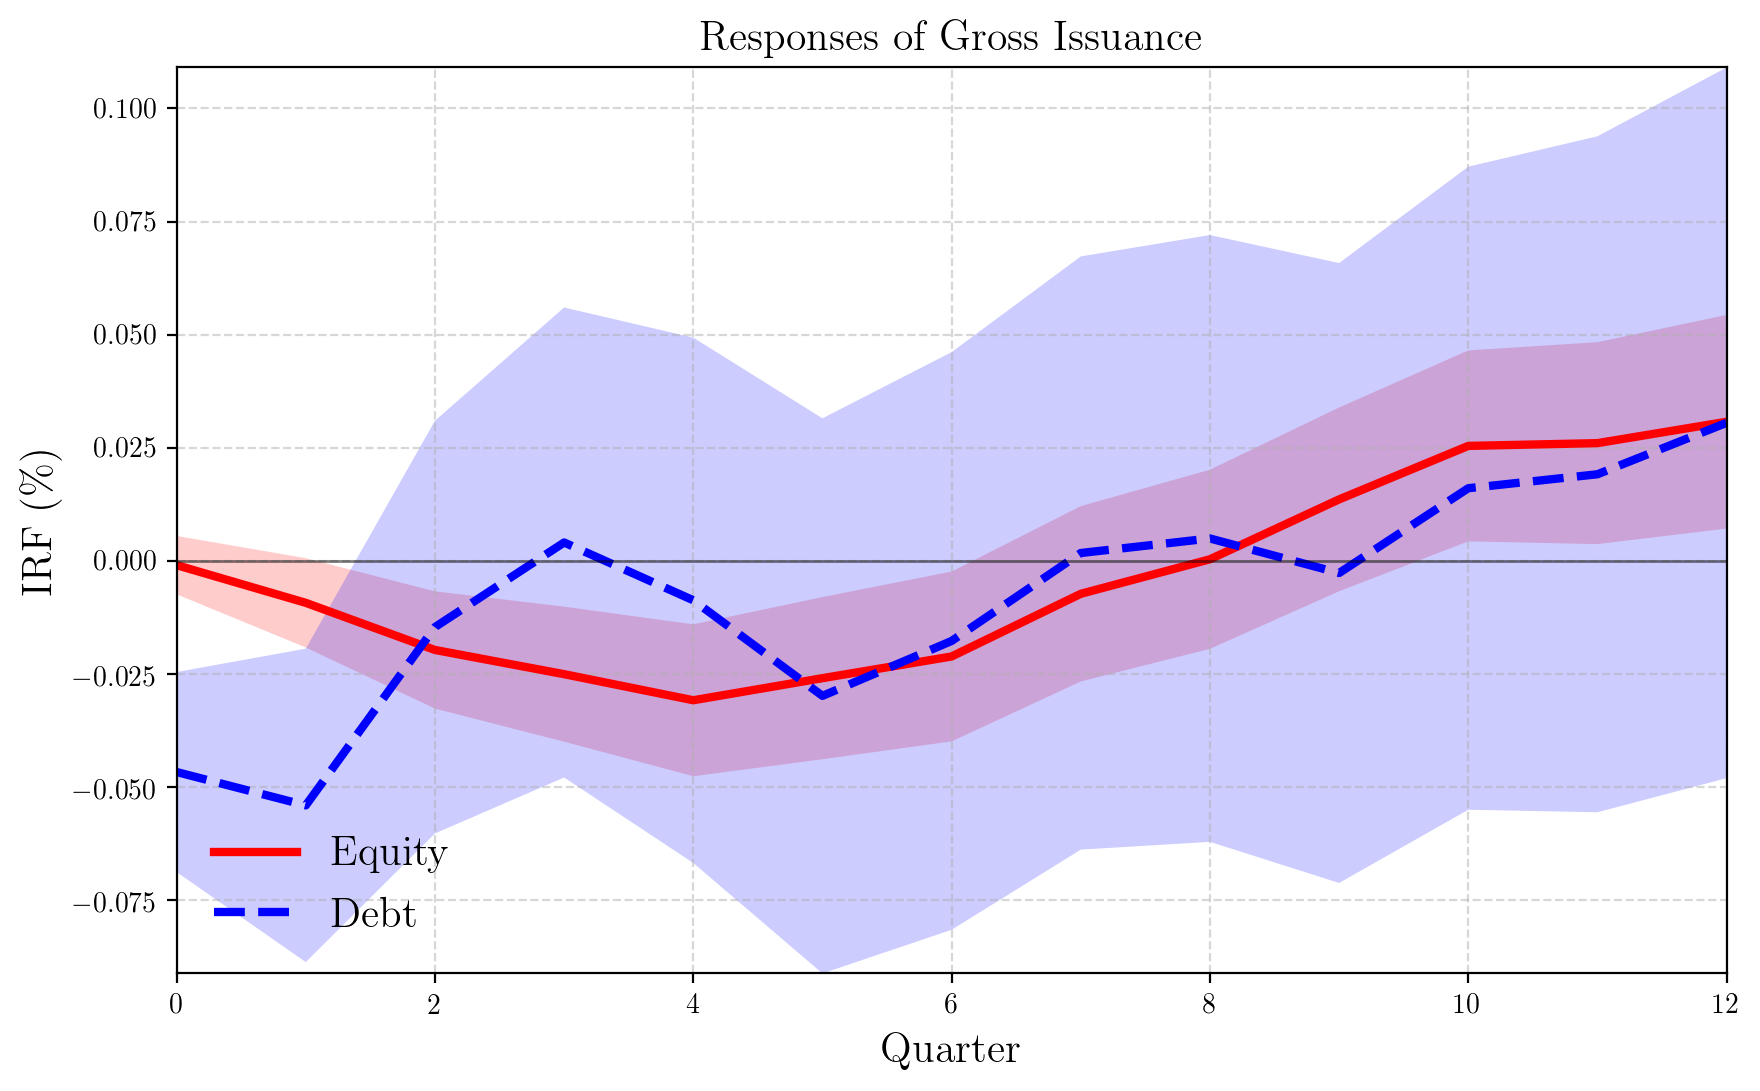

In [13]:
for NormVar in ['LagTotalAsset']:
    for SecVar in ['Cor']:
        IRF_Plot(IRF*100,STD*100, \
                 ['EquityGrossIssue'+'_'+NormVar+'_'+SecVar, \
                  'DebtGrossIssue'+'_'+NormVar+'_'+SecVar], \
                 ['Equity','Debt'], \
                 ['solid','dashed'],['red','blue'], \
                 FileName=GraphFolder+'GrossIssFlow'+'_'+NormVar+'_'+SecVar+'_'+'2MS_Quarterly.pdf', \
                 Title='Responses of Gross Issuance', \
                 XLabel='Quarter',YLabel='IRF (\%)')

### Net Financial Flows of Corporate and Non-Corporate Sectors  ($\frac{\texttt{Net Financial Flow}_{t}}{\texttt{Asset Book Value}_{t-1}}$)

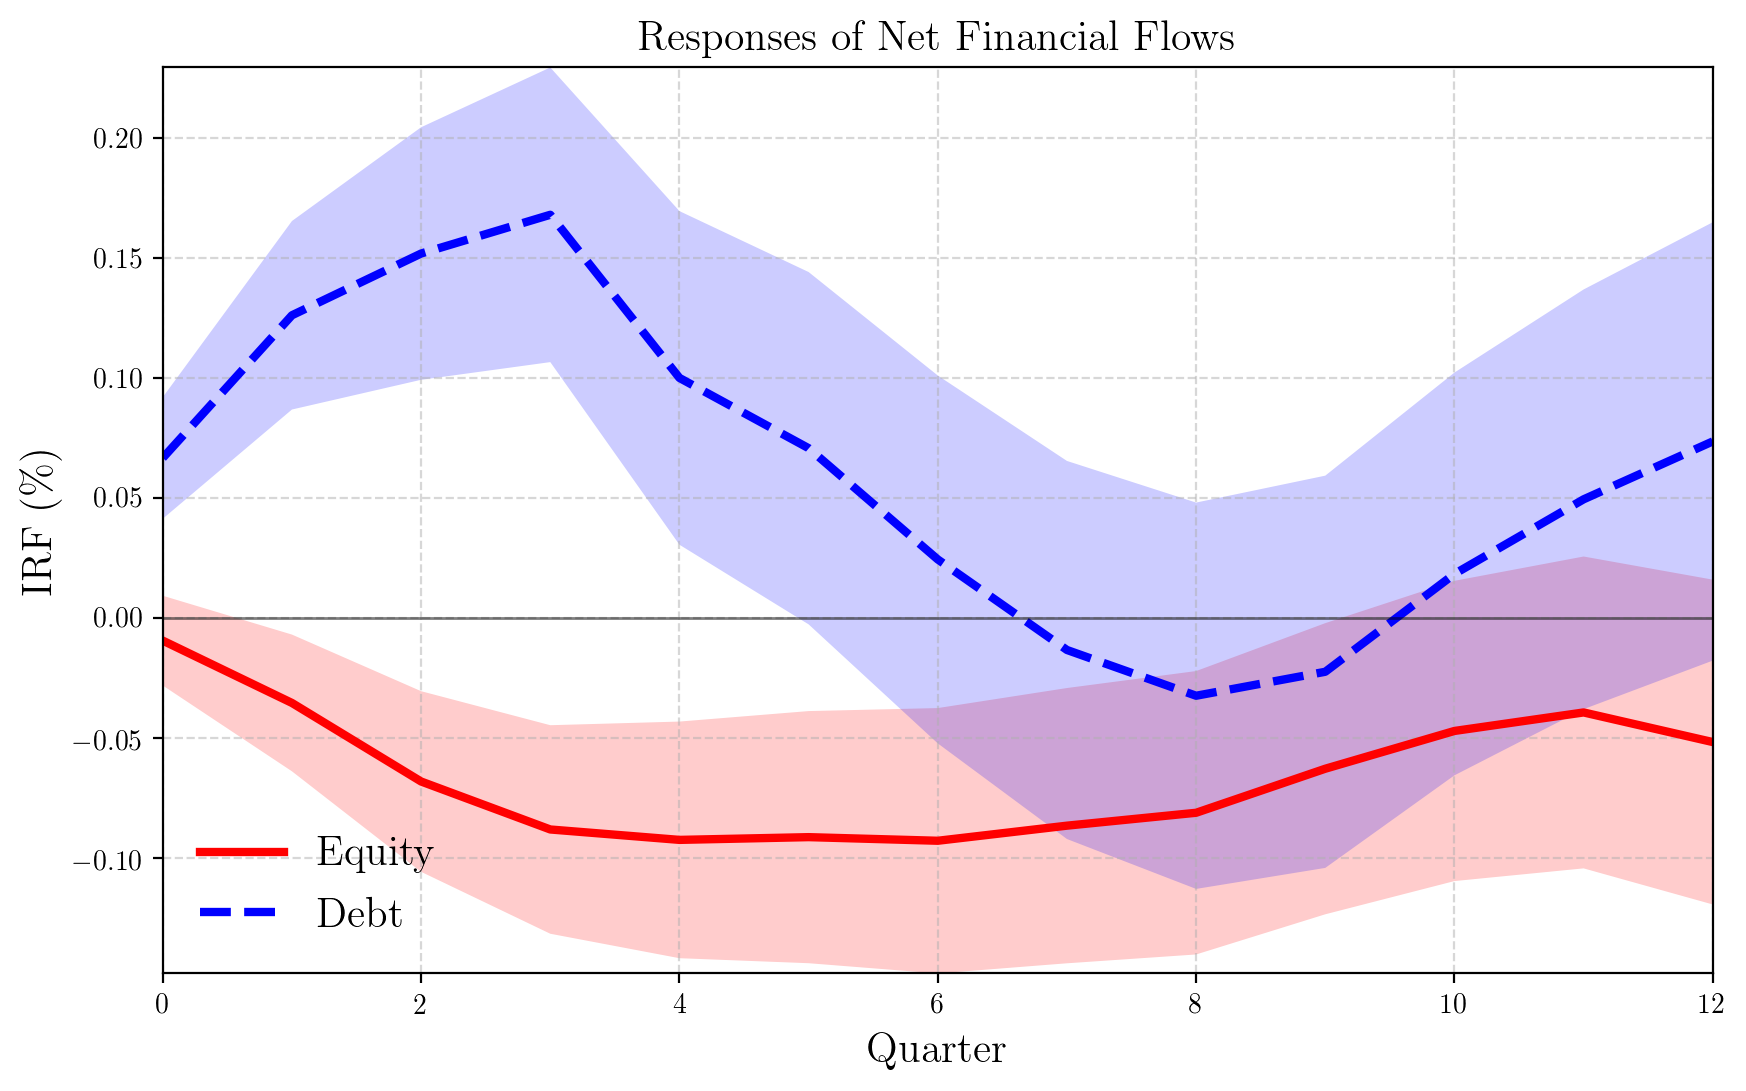

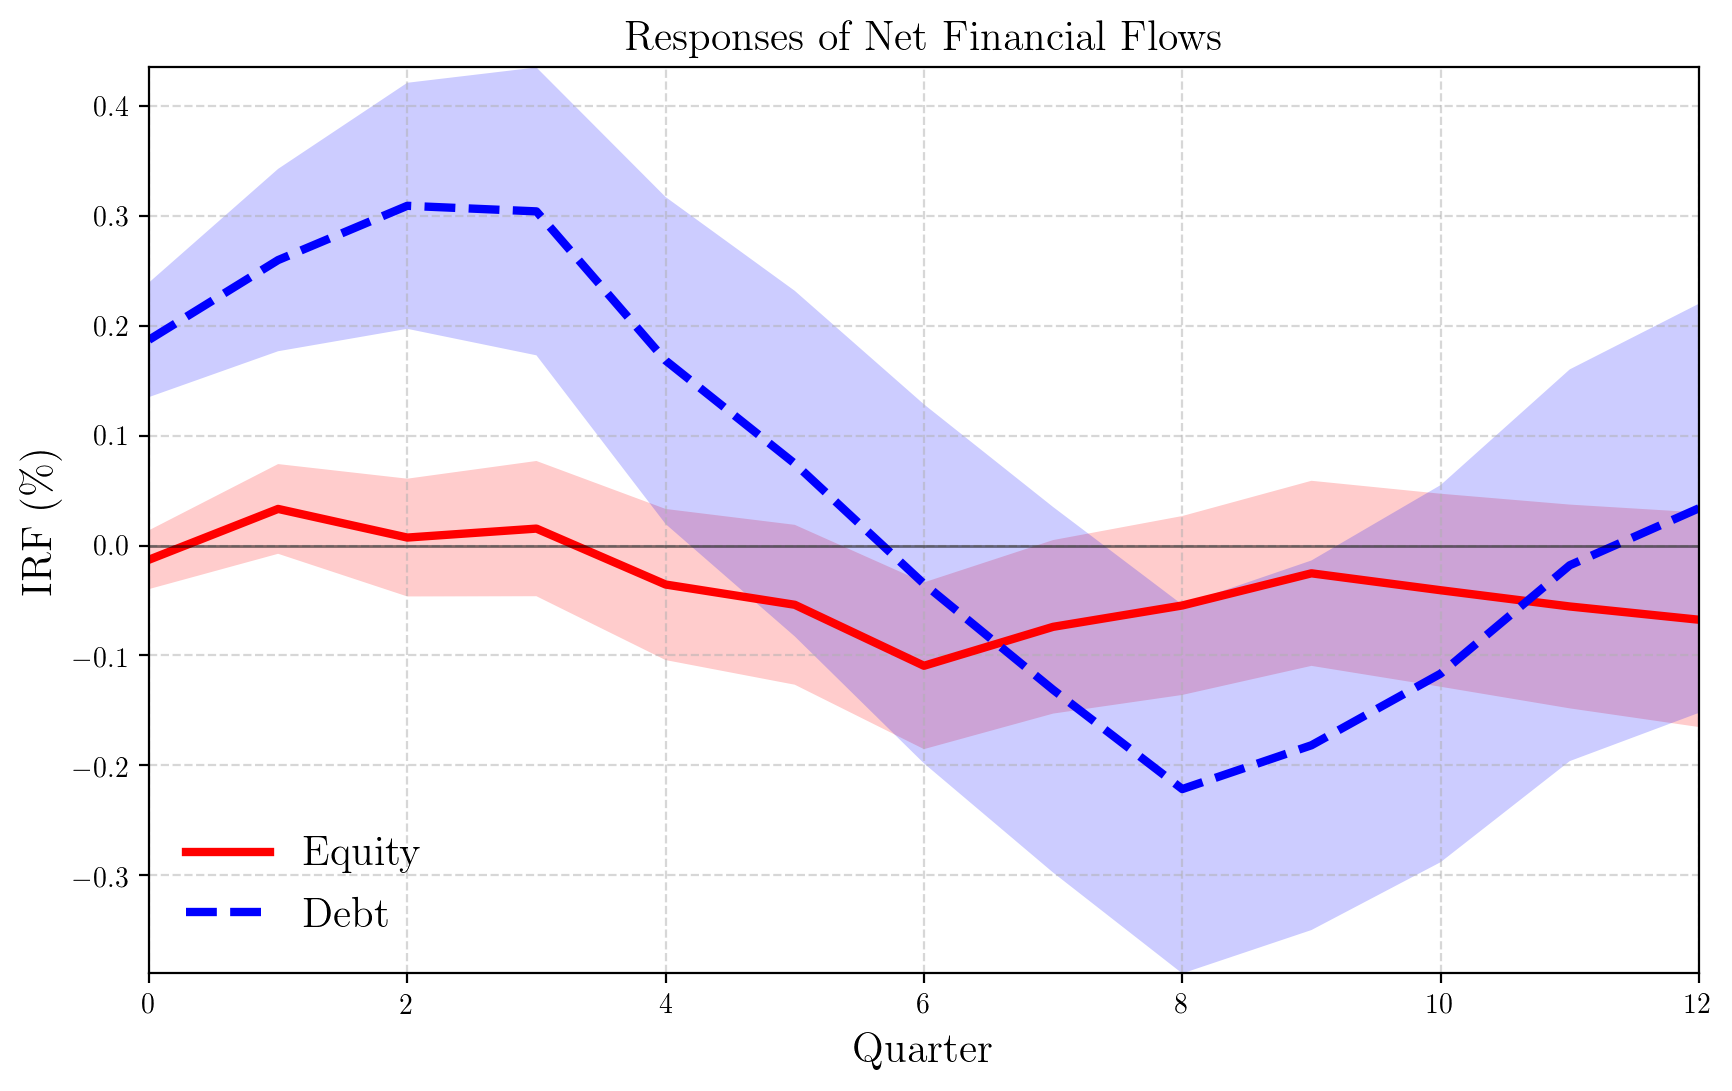

In [14]:
for NormVar in ['LagTotalAsset']:
    for SecVar in ['Cor','NonCor']:
        IRF_Plot(IRF*100,STD*100, \
                 ['EquityFin'+'_'+NormVar+'_'+SecVar,'DebtFin'+'_'+NormVar+'_'+SecVar], \
                 ['Equity','Debt'], \
                 ['solid','dashed'],['red','blue'], \
                 FileName=GraphFolder+'NetFinFlow'+'_'+NormVar+'_'+SecVar+'_'+'2MS_Quarterly.pdf', \
                 Title='Responses of Net Financial Flows', \
                 XLabel='Quarter',YLabel='IRF (\%)')

A robust conclusion from these results is: an unexpected increase in interest rate can lead to the decrease of net equity financing flow but increase of debt financing flow. 

### Net Equity Financing of Corporate Sector: Net Issuance vs. Dividend Payment

In Flow of Funds, net equity issuance is measured as:
$$ 
\begin{align}
&\texttt{Equity Issuace, both public and private}\\
-&\texttt{Repurchase reported in Compustat}\\
-&\texttt{M\&A from SDC}
\end{align}
$$


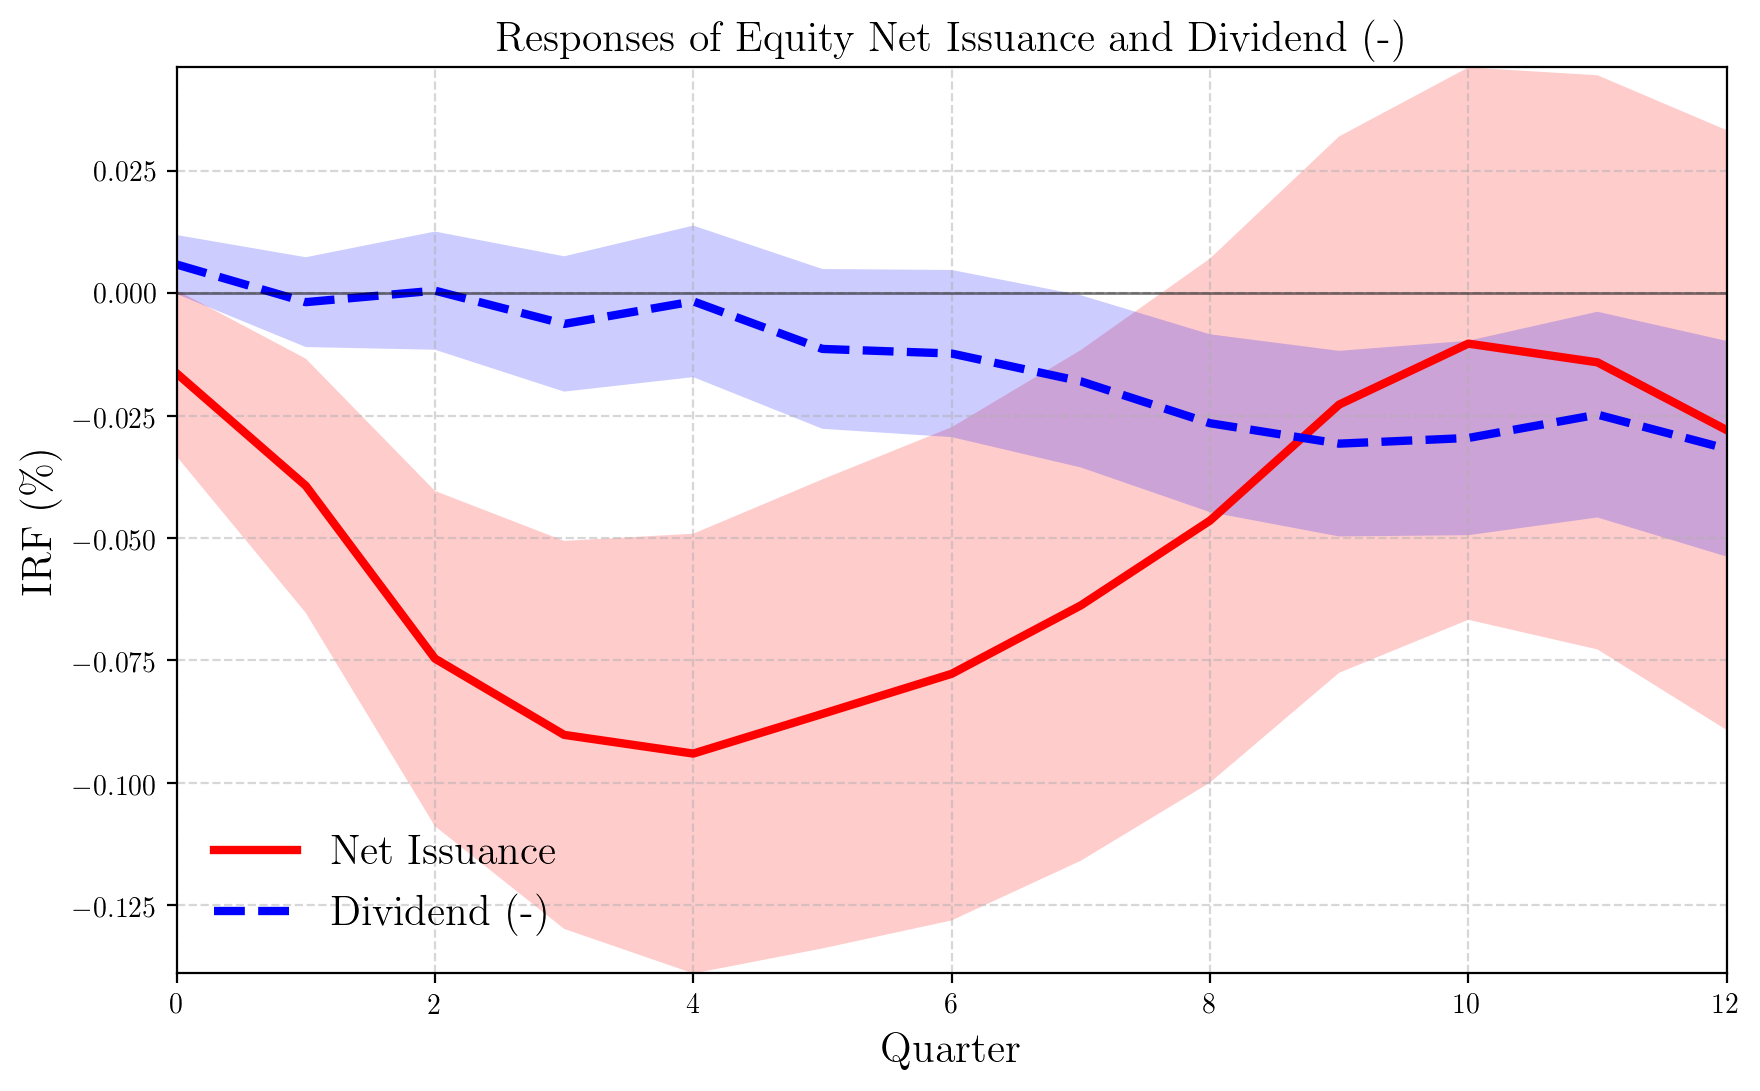

In [15]:
for NormVar in ['LagTotalAsset']:
    IRF_Plot(IRF*100,STD*100, \
             ['EquityNetIssue'+'_'+NormVar+'_Cor', \
              'DivPayment'+'_'+NormVar+'_Cor',], \
             ['Net Issuance','Dividend (-)'], \
             ['solid','dashed'],['red','blue'], \
             FileName=GraphFolder+'EquityFinDetails'+'_'+NormVar+'_Cor_'+'2MS_Quarterly.pdf', \
             Title='Responses of Equity Net Issuance and Dividend (-)', \
             XLabel='Quarter',YLabel='IRF (\%)')

The conclusion is: the response is mostly coming from the response of net equity issuance.

### Net Equity Issuance of Corporate Sector Excluding M\&A

Fed Board provides the disaggregated data underlying the equity financing flows which starts from Jan 1994. With this information, we can understand the underlying variation of net equity issuance. But given the short sample period, we cannot precisely identify the coefficients we care about except for the reponse of M\&A flow.

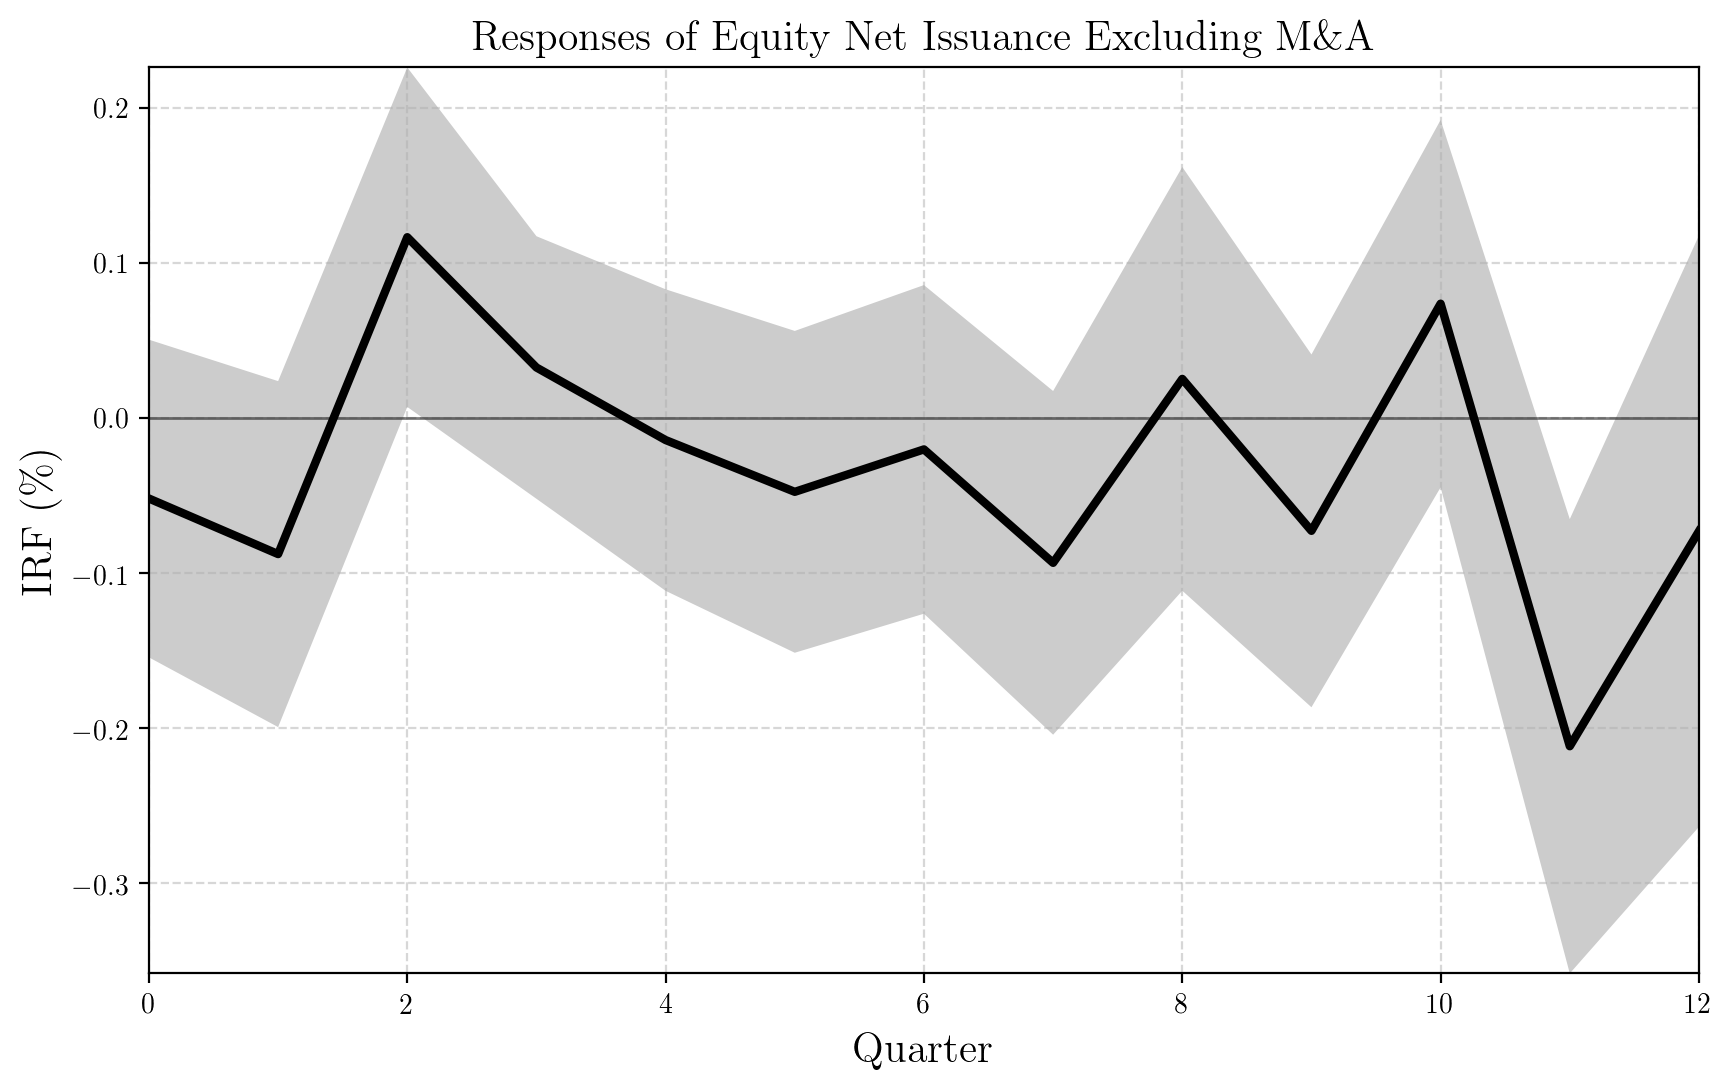

In [16]:
for NormVar in ['LagTotalAsset']:
    IRF_Plot(IRF*100,STD*100, \
             ['EquityNetIssueExMA'+'_'+NormVar+'_Cor'], \
             [], \
             ['solid'],['black'], \
             FileName=GraphFolder+'EquityNetIssExMA'+'_'+NormVar+'_Cor_'+'2MS_Quarterly.pdf', \
             Title='Responses of Equity Net Issuance Excluding M\&A', \
             XLabel='Quarter',YLabel='IRF (\%)')

### Net Equity Issuance of Corporate Sector: Issuance vs. Retirement

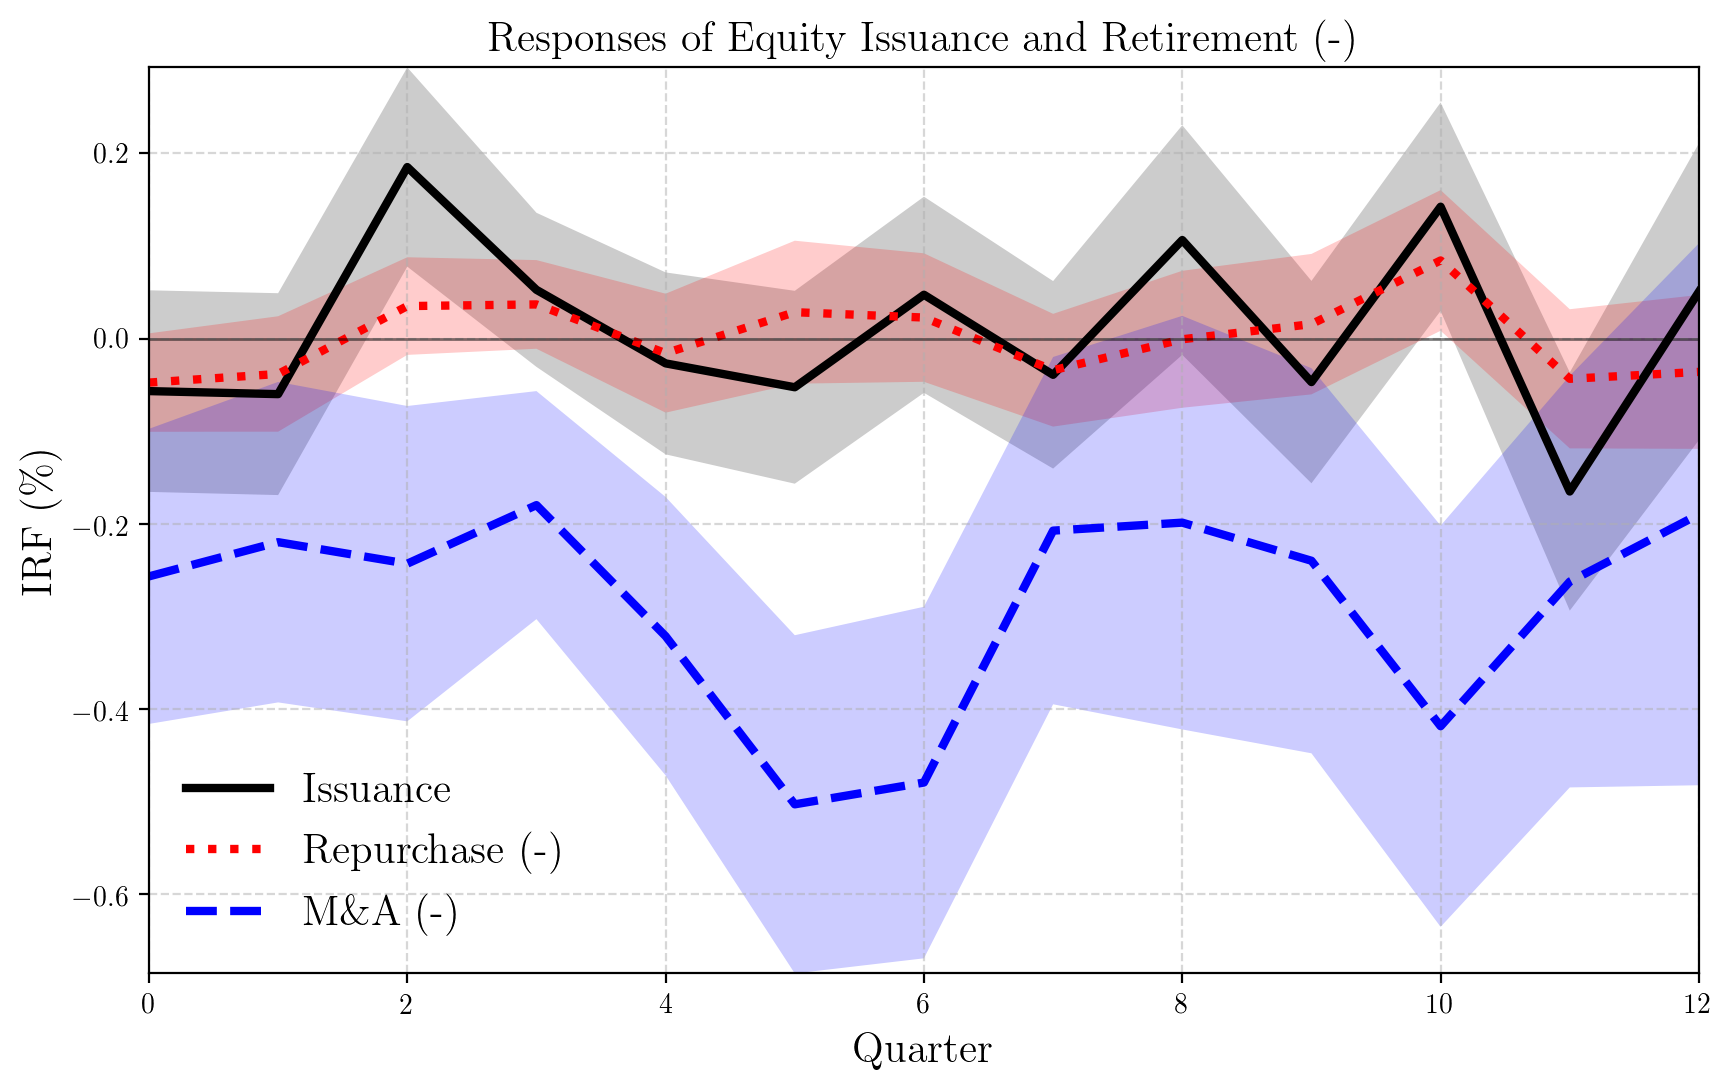

In [26]:
for NormVar in ['LagTotalAsset']:
    IRF_Plot(IRF*100,STD*100, \
             ['EquityIssue'+'_'+NormVar+'_Cor', \
              'EquityRepurchase'+'_'+NormVar+'_Cor', \
              'EquityMA'+'_'+NormVar+'_Cor'], \
             ['Issuance','Repurchase (-)','M\&A (-)'], \
             ['solid','dotted','dashed'],['black','red','blue'], \
             FileName=GraphFolder+'EquityIssDetails'+'_'+NormVar+'_Cor_'+'2MS_Quarterly.pdf', \
             Title='Responses of Equity Issuance and Retirement (-)', \
             XLabel='Quarter',YLabel='IRF (\%)')

The conclusion is: issuance does decrease after the interest rate increase, but most of the response comes from the response of M\&A.

### Equity Issuance: Public vs. Private

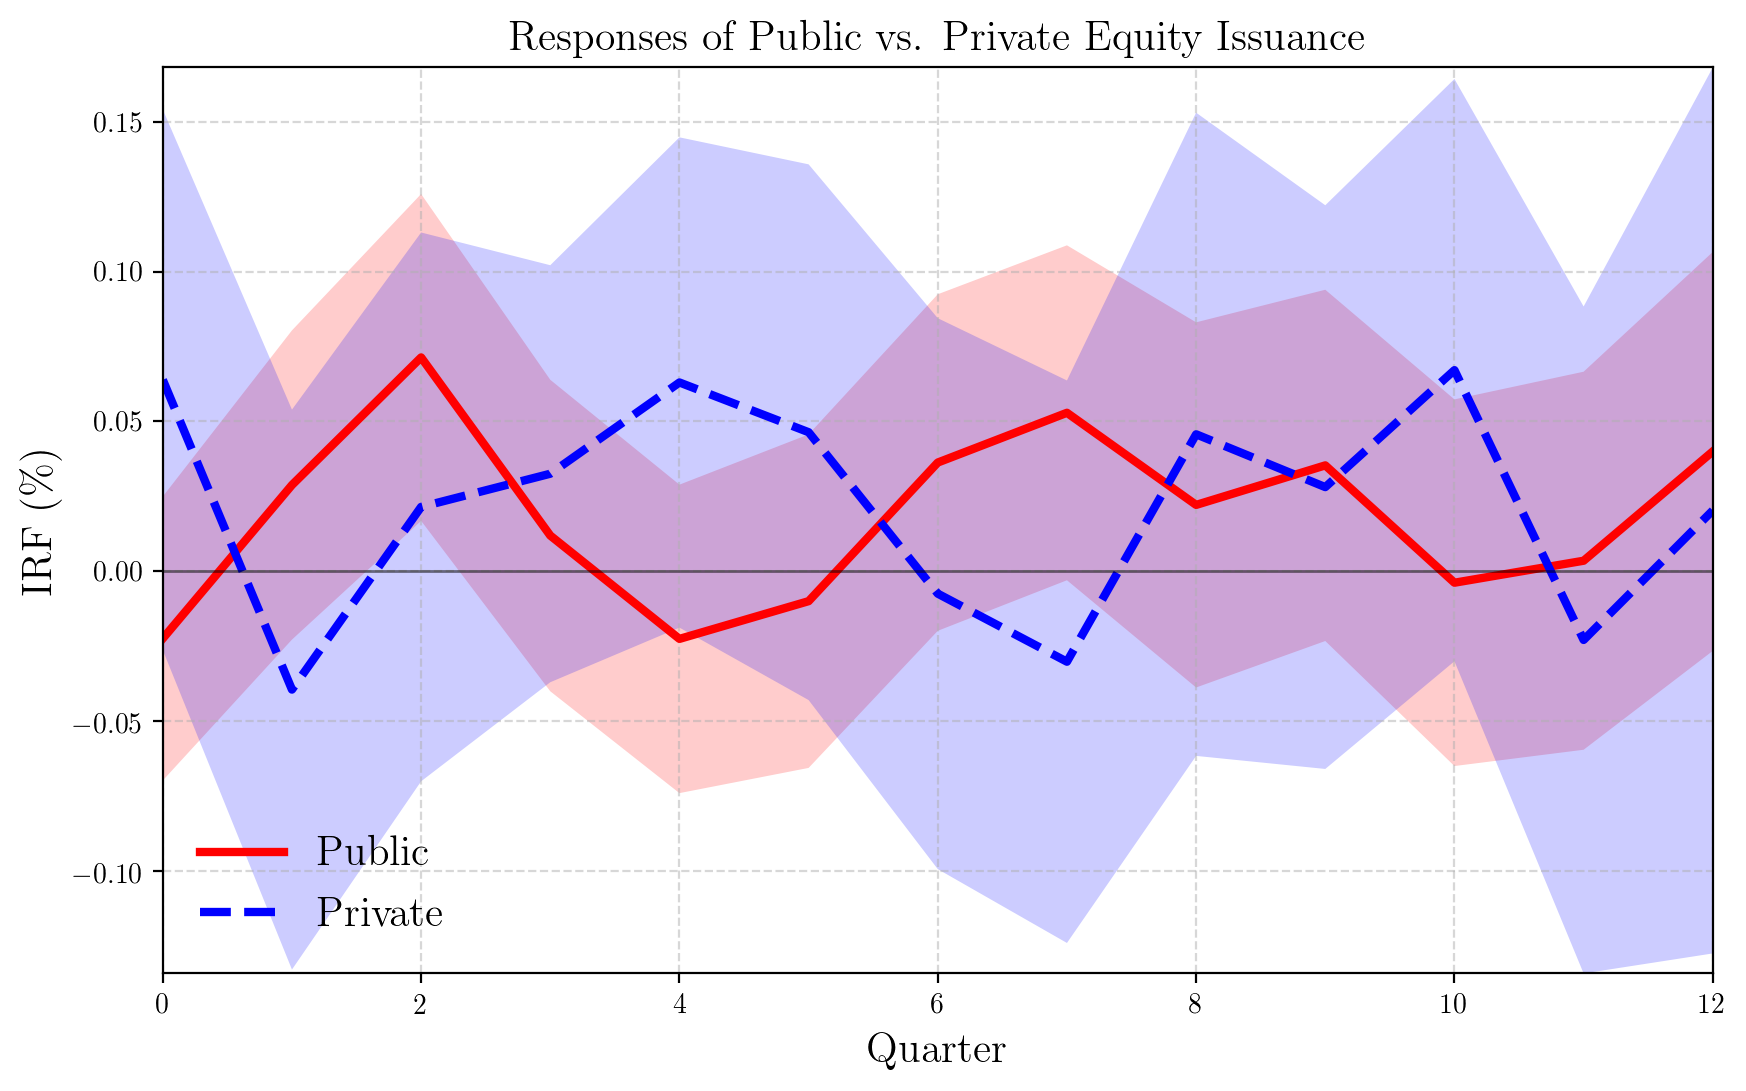

In [19]:
for NormVar in ['LagTotalAsset']:
    IRF_Plot(IRF*100,STD*100, \
             ['EquityIssuePublic'+'_'+NormVar+'_Cor', \
              'EquityIssuePrivate'+'_'+NormVar+'_Cor'], \
             ['Public','Private'], \
             ['solid','dashed'],['red','blue'], \
             FileName=GraphFolder+'EquityIssPubicPrivate'+'_'+NormVar+'_Cor_'+'2MS_Quarterly.pdf', \
             Title='Responses of Public vs. Private Equity Issuance', \
             XLabel='Quarter',YLabel='IRF (\%)')

## Response of Investment and Gross Value Added

### Investment Rate $\frac{\texttt{Capital Expenditure}_{t}}{\texttt{Asset Book Value}_{t-1}}$

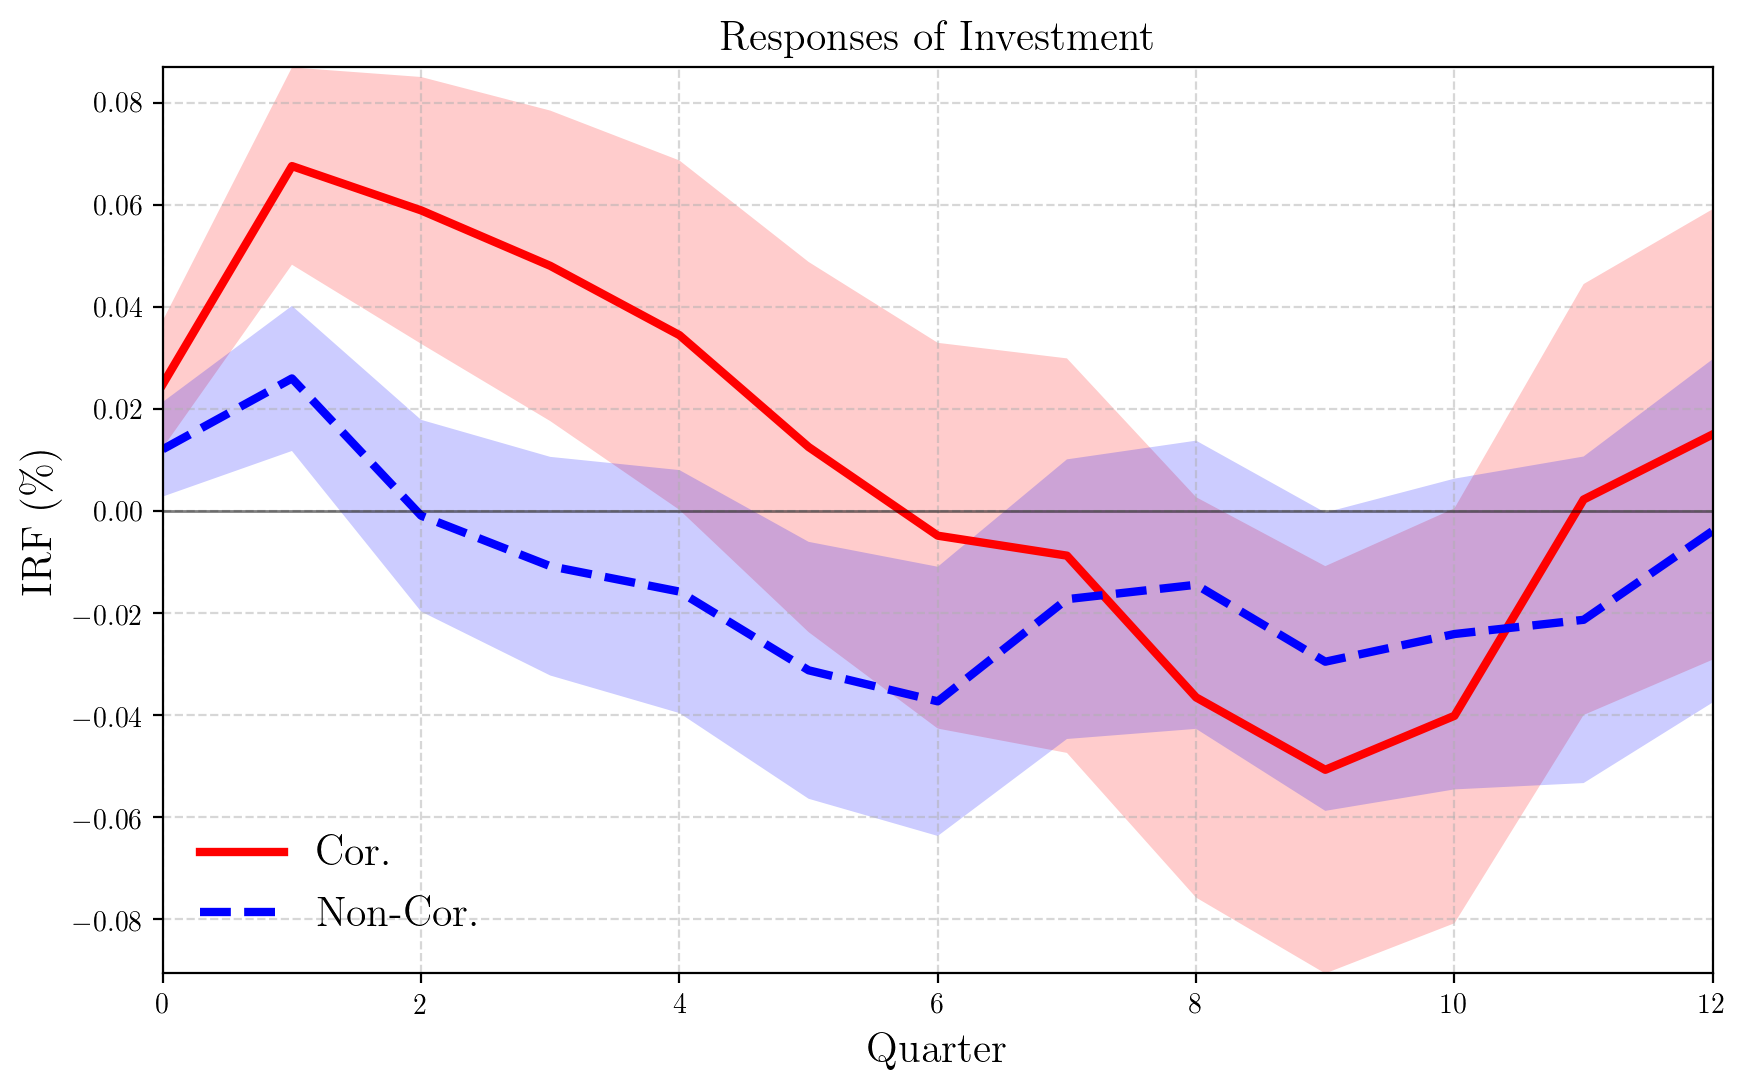

In [21]:
for NormVar in ['LagTotalAsset']:
    IRF_Plot(IRF*100,STD*100, \
             ['Inv'+'_'+NormVar+'_Cor','Inv'+'_'+NormVar+'_NonCor'], \
             ['Cor.','Non-Cor.'], \
             ['solid','dashed'],['red','blue'], \
             FileName=GraphFolder+'Inv'+'_'+NormVar+'2MS_Quarterly.pdf', \
             Title='Responses of Investment', \
             XLabel='Quarter',YLabel='IRF (\%)')

### Investment Flow $ log(\texttt{Capital Expenditure}) $

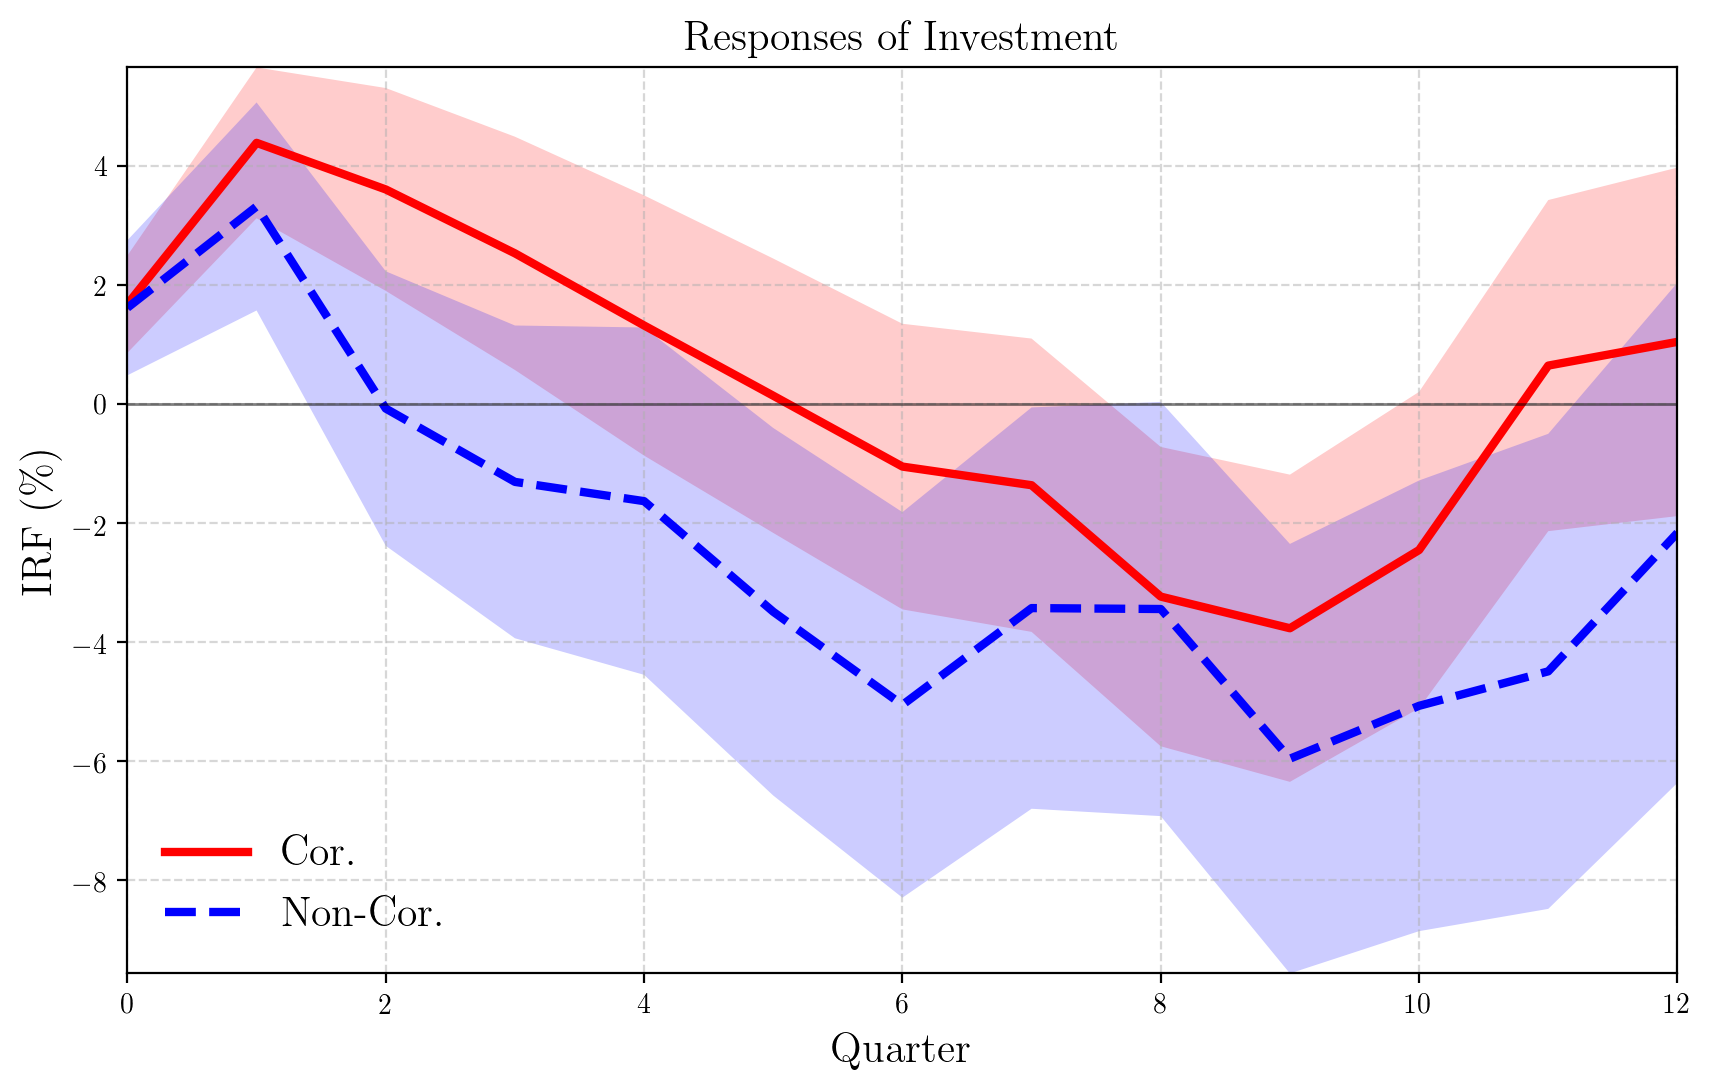

In [23]:
IRF_Plot(IRF*100,STD*100, \
         ['Inv_Cor','Inv_NonCor'], \
         ['Cor.','Non-Cor.'], \
         ['solid','dashed'],['red','blue'], \
         FileName=GraphFolder+'Inv2MS_Quarterly.pdf', \
         Title='Responses of Investment', \
         XLabel='Quarter',YLabel='IRF (\%)')

### Gross Value Added

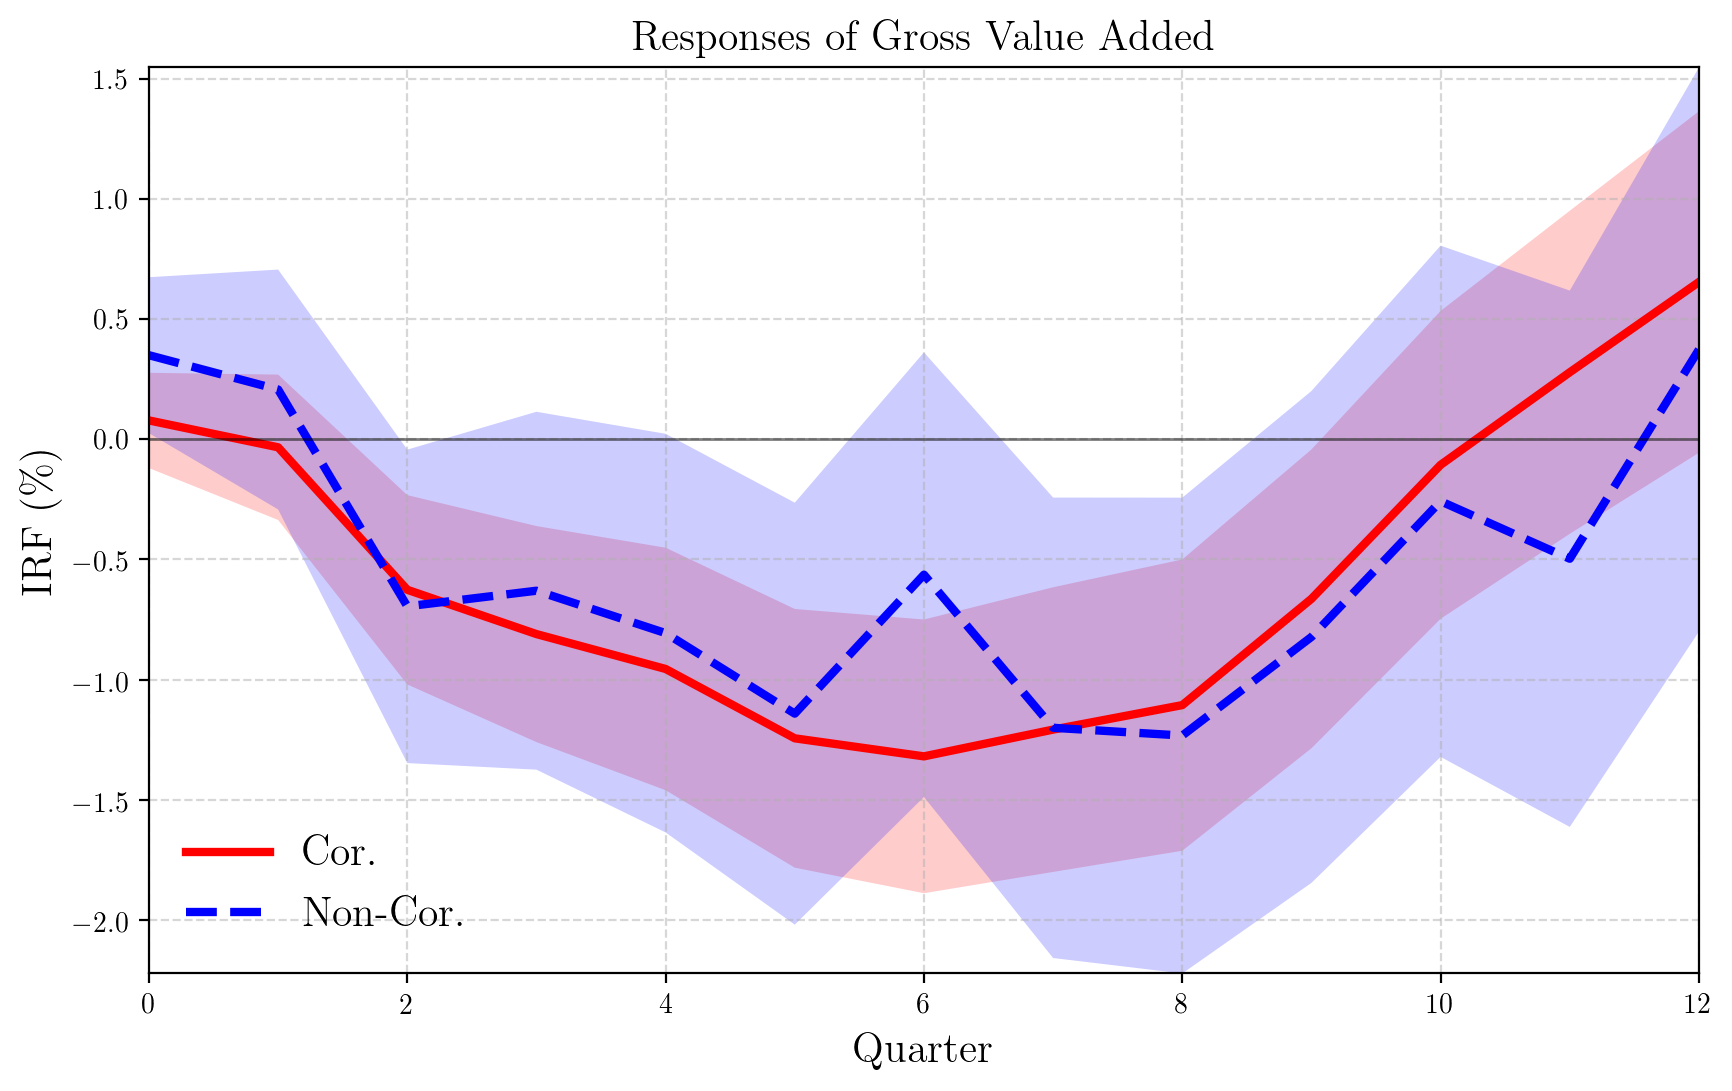

In [24]:
IRF_Plot(IRF*100,STD*100, \
         ['GrossValAdd_Cor','GrossValAdd_NonCor'], \
         ['Cor.','Non-Cor.'], \
         ['solid','dashed'],['red','blue'], \
         FileName=GraphFolder+'GrossValAdd2MS_Quarterly.pdf', \
         Title='Responses of Gross Value Added', \
         XLabel='Quarter',YLabel='IRF (\%)')

### Total Book Value Asset

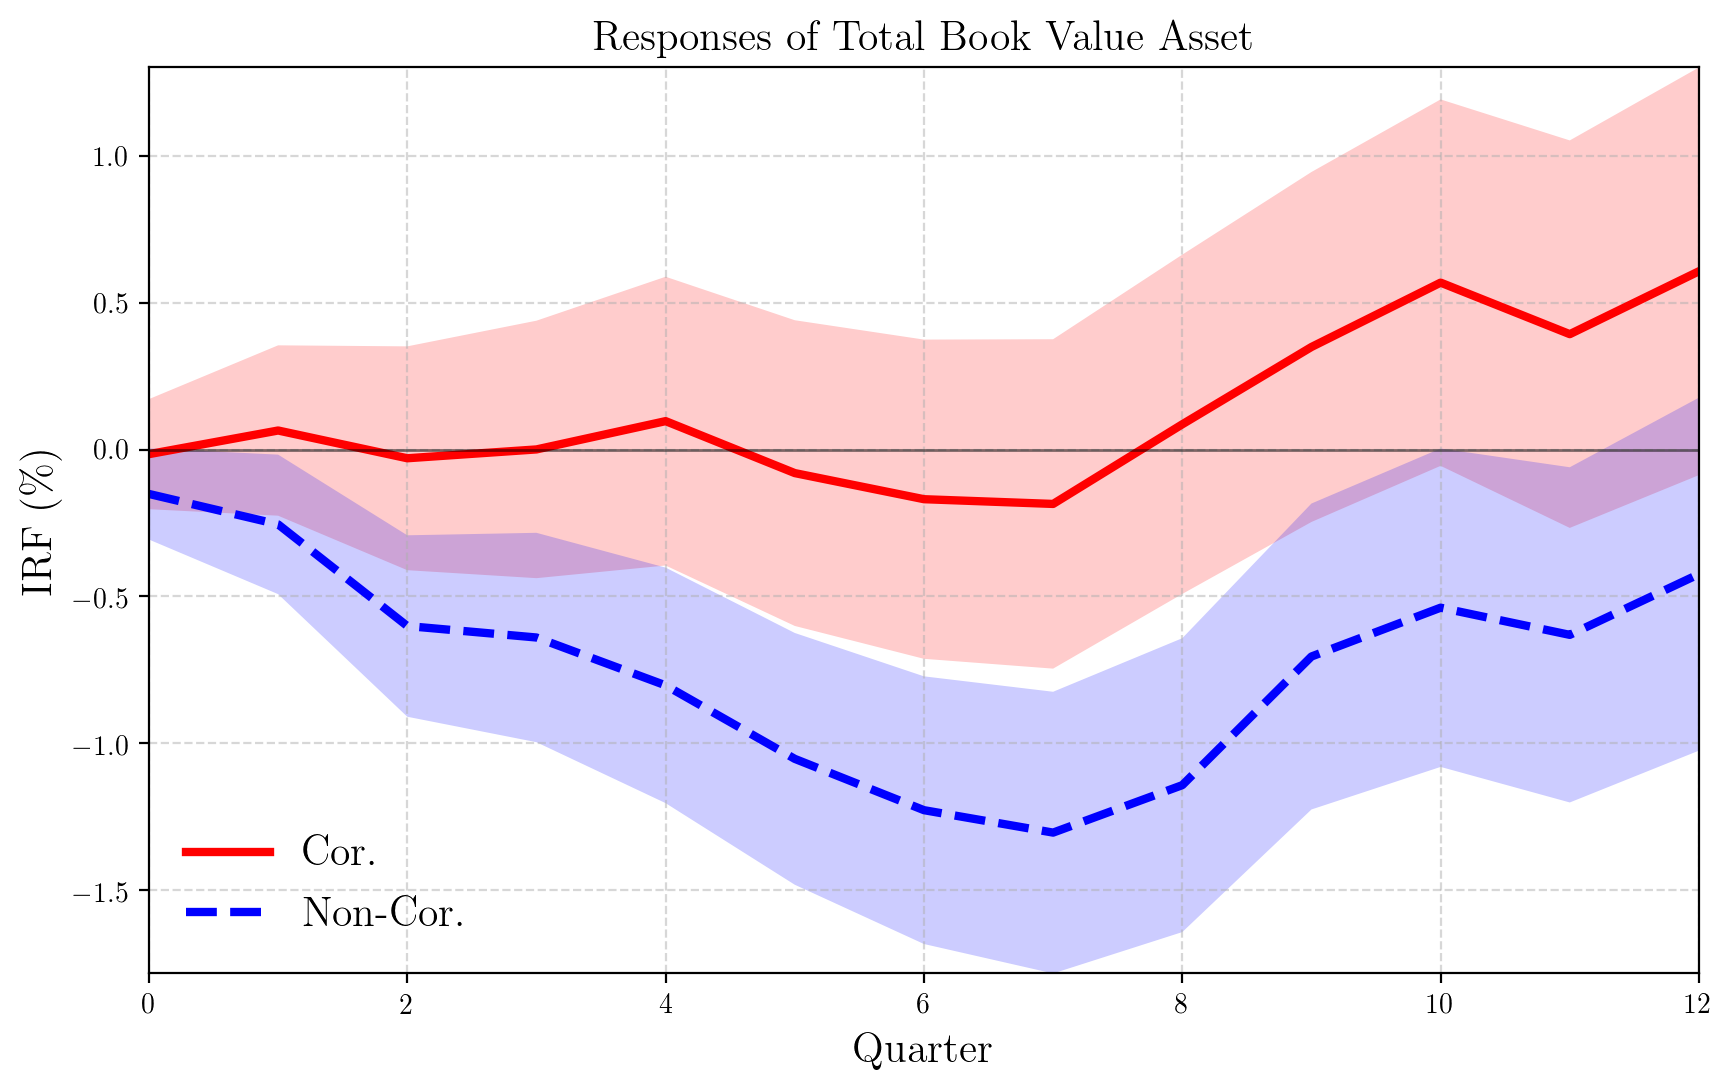

In [25]:
IRF_Plot(IRF*100,STD*100, \
         ['TotalAsset_Cor','TotalAsset_NonCor'], \
         ['Cor.','Non-Cor.'], \
         ['solid','dashed'],['red','blue'], \
         FileName=GraphFolder+'TotalAsset2MS_Quarterly.pdf', \
         Title='Responses of Total Book Value Asset', \
         XLabel='Quarter',YLabel='IRF (\%)')